In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_Feb_week4_Mean_calculation.ipynb
2022_Feb_week4_Mean_calculation_OC_01.txt
2022_Feb_week4_Mean_calculation_OC_02.txt
2022_Feb_week4_Mean_calculation_OC_03.txt
2022_Feb_week4_Mean_calculation_OC_04.txt
2022_Feb_week4_Mean_calculation_OC_05.txt
2022_Feb_week4_Mean_calculation_OC_06.txt
2022_Feb_week4_Mean_calculation_OC_07.txt
2022_Feb_week4_Mean_calculation_OC_08.txt
2022_Feb_week4_Mean_calculation_OC_09.txt
2022_Feb_week4_Mean_calculation_OC_10.txt
2022_Feb_week4_Mean_calculation_OC_11.txt
2022_Feb_week4_Mean_calculation_OC_12.txt
2022_Feb_week4_Mean_calculation_OC_13.txt
2022_Feb_week4_Mean_calculation_OC_14.txt
2022_Feb_week4_Mean_calculation_OC_15.txt
2022_Feb_week4_Mean_calculation_OC_16.txt
2022_Feb_week4_Mean_calculation_OC_17.txt
2022_Feb_week4_Mean_calculation_OC_18.txt
2022_Feb_week4_Mean_calculation_OC_19.txt
2022_Feb_week4_Mean_calculation_OC_20.txt
2022_Feb_week4_Mean_calculation_OC_21.txt
2022_Feb_week4_Mean_calculation_OC_22.txt
2022_Feb_week4_Mean_calculation_OC_23.

In [3]:
DP_Leo_Schwope_2002 = open("Schwope_2002.dat",'r').readlines()
N_dpleo_Schwope_2002 = len(DP_Leo_Schwope_2002)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Schwope_2002.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Schwope_2002))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Schwope_2002)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 44214.55325 1979-12-07 13:16:40.799989
1 44214.61562 1979-12-07 14:46:29.567984
2 44214.67798 1979-12-07 16:16:17.472013
3 44968.02309 1981-12-30 00:33:14.975982
4 44968.95712 1981-12-30 22:58:15.167993
5 44969.01962 1981-12-31 00:28:15.167993
6 44978.99755 1982-01-09 23:56:28.319997
7 44993.90078 1982-01-24 21:37:07.391982
8 44993.96328 1982-01-24 23:07:07.391982
9 44994.02642 1982-01-25 00:38:02.688000
10 45020.90513 1982-02-20 21:43:23.231987
11 45021.90292 1982-02-21 21:40:12.287981
12 45024.83386 1982-02-24 20:00:45.504011
13 45731.9664 1984-02-01 23:11:36.959982
14 45763.83373 1984-03-04 20:00:34.272006
15 45854.8828 1984-06-03 21:11:13.919981
16 46054.94231 1984-12-20 22:36:55.583986
17 46086.93565 1985-01-21 22:27:20.159989
18 46086.99796 1985-01-21 23:57:03.743985
19 48560.5578 1991-10-31 13:23:13.920005
20 48773.21509 1992-05-31 05:09:43.776006
21 48774.21293 1992-06-01 05:06:37.151993
22 49137.91294 1993-05-30 21:54:38.016015
23 49143.96214 1993-06-05 23:05:28.895996
24 49

In [5]:
T0_bjd = 2448773.2148535196 - 2400000
T0_bjd_err = 2.9382757275464414e-09
P0_day = 0.062362845501702645
P0_day_err = 2.587983620097543e-19

In [6]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT_err = [i for i in range(N_dpleo_Schwope_2002)]
E_af = [i for i in range(N_dpleo_Schwope_2002)] #float number
E_ak = [i for i in range(N_dpleo_Schwope_2002)] #integer number
E_aj = [i for i in range(N_dpleo_Schwope_2002)] #integer number
P_aE = [i for i in range(N_dpleo_Schwope_2002)]
P_err_aE = [i for i in range(N_dpleo_Schwope_2002)]
T_aC_linear = [i for i in range(N_dpleo_Schwope_2002)]
T_aO_linear = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_a = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_std_a = [i for i in range(N_dpleo_Schwope_2002)]

In [7]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Schwope_2002):
    BJD_time = np.array(T_obs)+delta_tdb_tt + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Schwope_2002.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	44214.553250	44214.553210	3.439531	14.999650
1	2444214.615620	-73098	44214.615620	44214.615573	4.057680	14.999650
2	2444214.677980	-73097	44214.677980	44214.677936	3.811829	14.999650
3	2444968.023090	-61017	44968.023090	44968.021110	171.111556	99.999970
4	2444968.957120	-61002	44968.957120	44968.956552	49.055785	99.999970
5	2444969.019620	-61001	44969.019620	44969.018915	60.905933	99.999970
6	2444978.997550	-60841	44978.997550	44978.996970	50.081718	99.999970
7	2444993.900780	-60602	44993.900780	44993.901690	-78.660753	59.999362
8	2444993.963280	-60601	44993.963280	44993.964053	-66.810605	59.999362
9	2444994.026420	-60600	44994.026420	44994.026416	0.335544	59.999362
10	2445020.905130	-60169	45020.905130	45020.904803	28.293613	19.999618
11	2445021.902920	-60153	45021.902920	45021.902608	26.951991	19.999618
12	2445024.833860	-60106	45024.833860	45024.833662	17.124978	59.999362
13	2445731.966400	-4

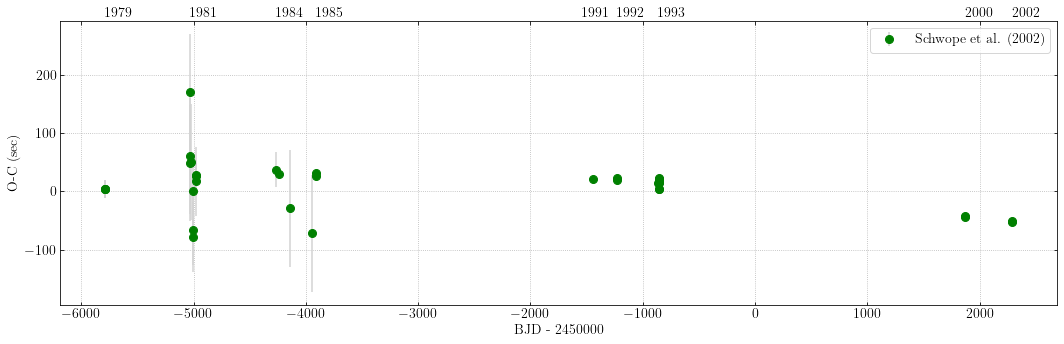

In [8]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0] - N
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 300, '1979')
plt.text(BJD_time_Schwope_2002[3], 300, '1981')
plt.text(BJD_time_Schwope_2002[13], 300, '1984')
plt.text(BJD_time_Schwope_2002[17], 300, '1985')
plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
plt.text(BJD_time_Schwope_2002[20], 300, '1992')
plt.text(BJD_time_Schwope_2002[22], 300, '1993')
plt.text(BJD_time_Schwope_2002[30], 300, '2000')
plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

In [9]:
#Checkinng month,year from BJD
BJD_time = Data_Schwope_2002[:,0] - 2400000
OC_s = Data_Schwope_2002[:,4]
OC_s_err = Data_Schwope_2002[:,5]


gp1 = []
gp2 = []
gp3 = []
gp4 = []
gp5 = []
gp6 = []
gp7 = []
gp8 = []
gp9 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[0] >= BJD_time[i]:        #gp1
        gp1.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[12] >= BJD_time[i]:       #gp2
        gp2.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[16] >= BJD_time[i]:       #gp3
        gp3.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[18] >= BJD_time[i]:       #gp4
        gp4.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[19] >= BJD_time[i]:       #gp5
        gp5.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[21] >= BJD_time[i]:       #gp6
        gp6.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[29] >= BJD_time[i]:       #gp7
        gp7.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp8
        gp8.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[33] >= BJD_time[i]:       #gp9
        gp9.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    
#-------------------------- Group1 -----------#        
rerults = gp1
f = open('Weighted_mean_calculation_gp1.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group2 -----------#        
rerults = gp2
f = open('Weighted_mean_calculation_gp2.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group3 -----------#        
rerults = gp3
f = open('Weighted_mean_calculation_gp3.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group4 -----------#        
rerults = gp4
f = open('Weighted_mean_calculation_gp4.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group5 -----------#        
rerults = gp5
f = open('Weighted_mean_calculation_gp5.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group6 -----------#        
rerults = gp6
f = open('Weighted_mean_calculation_gp6.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group7 -----------#        
rerults = gp7
f = open('Weighted_mean_calculation_gp7.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group8 -----------#        
rerults = gp8
f = open('Weighted_mean_calculation_gp8.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group9 -----------#        
rerults = gp9
f = open('Weighted_mean_calculation_gp9.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 1979-12-07 13:16:40.799989 44214.55324999988 3.439531 14.99965
1 1979-12-07 14:46:29.567984 44214.61561999982 4.05768 14.99965
2 1979-12-07 16:16:17.472013 44214.67798000015 3.811829 14.99965
3 1981-12-30 00:33:14.975982 44968.0230899998 171.111556 99.99997
4 1981-12-30 22:58:15.167993 44968.95711999992 49.055785 99.99997
5 1981-12-31 00:28:15.167993 44969.01961999992 60.905933 99.99997
6 1982-01-09 23:56:28.319997 44978.99754999997 50.081718 99.99997
7 1982-01-24 21:37:07.391982 44993.90077999979 -78.660753 59.999362
8 1982-01-24 23:07:07.391982 44993.96327999979 -66.810605 59.999362
9 1982-01-25 00:38:02.688000 44994.02642000001 0.335544 59.999362
10 1982-02-20 21:43:23.231987 45020.905129999854 28.293613 19.999618
11 1982-02-21 21:40:12.287981 45021.90291999979 26.951991 19.999618
12 1982-02-24 20:00:45.504011 45024.83386000013 17.124978 59.999362
13 1984-02-01 23:11:36.959982 45731.9663999998 37.416553 29.999554
14 1984-03-

In [10]:
#The 1st set of data point:
Input_gp1 = "Weighted_mean_calculation_gp1.txt"
Data_gp1   = np.genfromtxt(Input_gp1)
N_data_gp1 = len(Data_gp1)
print('Number of data group#1:',N_data_gp1)

#The 2nd set of data point:
Input_gp2 = "Weighted_mean_calculation_gp2.txt"
Data_gp2   = np.genfromtxt(Input_gp2)
N_data_gp2 = len(Data_gp2)
print('Number of data group#2:',N_data_gp2)

#The 3rd set of data point:
Input_gp3 = "Weighted_mean_calculation_gp3.txt"
Data_gp3   = np.genfromtxt(Input_gp3)
N_data_gp3 = len(Data_gp3)
print('Number of data group#3:',N_data_gp3)

#The 4th set of data point:
Input_gp4 = "Weighted_mean_calculation_gp4.txt"
Data_gp4   = np.genfromtxt(Input_gp4)
N_data_gp4 = len(Data_gp4)
print('Number of data group#4:',N_data_gp4)

#The 5th set of data point:
Input_gp5 = "Weighted_mean_calculation_gp5.txt"
Data_gp5   = np.genfromtxt(Input_gp5)
N_data_gp5 = len(Data_gp5)
print('Number of data group#5:',N_data_gp5)

#The 6th set of data point:
Input_gp6 = "Weighted_mean_calculation_gp6.txt"
Data_gp6   = np.genfromtxt(Input_gp6)
N_data_gp6 = len(Data_gp6)
print('Number of data group#6:',N_data_gp6)

#The 7th set of data point:
Input_gp7 = "Weighted_mean_calculation_gp7.txt"
Data_gp7   = np.genfromtxt(Input_gp7)
N_data_gp7 = len(Data_gp7)
print('Number of data group#7:',N_data_gp7)

#The 8th set of data point:
Input_gp8 = "Weighted_mean_calculation_gp8.txt"
Data_gp8   = np.genfromtxt(Input_gp8)
N_data_gp8 = len(Data_gp8)
print('Number of data group#8:',N_data_gp8)

#The 9th set of data point:
Input_gp9 = "Weighted_mean_calculation_gp9.txt"
Data_gp9   = np.genfromtxt(Input_gp9)
N_data_gp9 = len(Data_gp9)
print('Number of data group#9:',N_data_gp9)

Number of data group#1: 3
Number of data group#2: 12
Number of data group#3: 4
Number of data group#4: 2
Number of data group#5: 3
Number of data group#6: 2
Number of data group#7: 8
Number of data group#8: 2
Number of data group#9: 2


In [76]:
#Group1
x1_mean = 44214.553249999881
y1_mean = -49.848409
dy1 = 18.248615

In [78]:
#Group2
BJD_time_a2 = [i for i in range(N_data_gp2)]
OC_s_a2 = [i for i in range(N_data_gp2)]
OC_err_s_a2 = [i for i in range(N_data_gp2)]

for i in range(N_data_gp2):
    BJD_time = Data_gp2[:,0]                   #Input file of x
    BJD_time_a2[i] = BJD_time
    OC_s = Data_gp2[:,1]                       #Input file of y
    OC_s_a2[i] = OC_s 
    OC_s_err = Data_gp2[:,2]                   #Input file of y_err
    OC_err_s_a2[i] = OC_s_err
    len_OC_s_a2 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a2[i])/len_OC_s_a2    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a2[i])/len_OC_s_a2               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a2[i]**2))/len_OC_s_a2   #Calculate the error propagation od OC

x2_mean = BJD_time_mean                  
y2_mean = y_mean                         
dy2 = dy                 
print('Mean BJD:', x2_mean)               #Print Mean BJD
print('Mean OC:', y2_mean)                #Print the weighted mean
print('Mean OC_err:',dy2)                 #Print the error of the weighted mean

Mean BJD: 44863.651947499915
Mean OC: 22.188272416666667
Mean OC_err: 19.658476084363823


In [79]:
#Group3
BJD_time_a3 = [i for i in range(N_data_gp3)]
OC_s_a3 = [i for i in range(N_data_gp3)]
OC_err_s_a3 = [i for i in range(N_data_gp3)]

for i in range(N_data_gp3):
    BJD_time = Data_gp3[:,0]                   #Input file of x
    BJD_time_a3[i] = BJD_time
    OC_s = Data_gp3[:,1]                       #Input file of y
    OC_s_a3[i] = OC_s 
    OC_s_err = Data_gp3[:,2]                   #Input file of y_err
    OC_err_s_a3[i] = OC_s_err
    len_OC_s_a3 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a3[i])/len_OC_s_a3    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a3[i])/len_OC_s_a3               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a3[i]**2))/len_OC_s_a3   #Calculate the error propagation od OC

x3_mean = BJD_time_mean                  
y3_mean = y_mean                         
dy3 = dy                 
print('Mean BJD:', x3_mean)               #Print Mean BJD
print('Mean OC:', y3_mean)                #Print the weighted mean
print('Mean OC_err:',dy3)                 #Print the error of the weighted mean

Mean BJD: 45851.406309999875
Mean OC: -8.362239500000001
Mean OC_err: 36.16365438900855


In [80]:
#Group4
BJD_time_a4 = [i for i in range(N_data_gp4)]
OC_s_a4 = [i for i in range(N_data_gp4)]
OC_err_s_a4 = [i for i in range(N_data_gp4)]

for i in range(N_data_gp4):
    BJD_time = Data_gp4[:,0]                   #Input file of x
    BJD_time_a4[i] = BJD_time
    OC_s = Data_gp4[:,1]                       #Input file of y
    OC_s_a4[i] = OC_s 
    OC_s_err = Data_gp4[:,2]                   #Input file of y_err
    OC_err_s_a4[i] = OC_s_err
    len_OC_s_a4 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a4[i])/len_OC_s_a4    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a4[i])/len_OC_s_a4               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a4[i]**2))/len_OC_s_a4   #Calculate the error propagation od OC

x4_mean = BJD_time_mean                  
y4_mean = y_mean                         
dy4 = dy                 
print('Mean BJD:', x4_mean)               #Print Mean BJD
print('Mean OC:', y4_mean)                #Print the weighted mean
print('Mean OC_err:',dy4)                 #Print the error of the weighted mean

Mean BJD: 46086.96680499986
Mean OC: 29.3797595
Mean OC_err: 2.1210049739352335


In [81]:
#Group5
x5_mean = 48560.557800000068
y5_mean = -14.247410
dy5 = 7.872520

In [82]:
#Group6
BJD_time_a6 = [i for i in range(N_data_gp6)]
OC_s_a6 = [i for i in range(N_data_gp6)]
OC_err_s_a6 = [i for i in range(N_data_gp6)]

for i in range(N_data_gp6):
    BJD_time = Data_gp6[:,0]                   #Input file of x
    BJD_time_a6[i] = BJD_time
    OC_s = Data_gp6[:,1]                       #Input file of y
    OC_s_a6[i] = OC_s 
    OC_s_err = Data_gp6[:,2]                   #Input file of y_err
    OC_err_s_a6[i] = OC_s_err
    len_OC_s_a6 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a6[i])/len_OC_s_a6    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a6[i])/len_OC_s_a6               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a6[i]**2))/len_OC_s_a6   #Calculate the error propagation od OC

x6_mean = BJD_time_mean                  
y6_mean = y_mean                         
dy6 = dy                 
print('Mean BJD:', x6_mean)               #Print Mean BJD
print('Mean OC:', y6_mean)                #Print the weighted mean
print('Mean OC_err:',dy6)                 #Print the error of the weighted mean

Mean BJD: 48773.714009999996
Mean OC: 21.921098
Mean OC_err: 3.535331673393318


In [83]:
#Group7
BJD_time_a7 = [i for i in range(N_data_gp7)]
OC_s_a7 = [i for i in range(N_data_gp7)]
OC_err_s_a7 = [i for i in range(N_data_gp7)]

for i in range(N_data_gp7):
    BJD_time = Data_gp7[:,0]                   #Input file of x
    BJD_time_a7[i] = BJD_time
    OC_s = Data_gp7[:,1]                       #Input file of y
    OC_s_a7[i] = OC_s 
    OC_s_err = Data_gp7[:,2]                   #Input file of y_err
    OC_err_s_a7[i] = OC_s_err
    len_OC_s_a7 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a7[i])/len_OC_s_a7    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a7[i])/len_OC_s_a7               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a7[i]**2))/len_OC_s_a7   #Calculate the error propagation od OC

x7_mean = BJD_time_mean                  
y7_mean = y_mean                         
dy7 = dy                 
print('Mean BJD:', x7_mean)               #Print Mean BJD
print('Mean OC:', y7_mean)                #Print the weighted mean
print('Mean OC_err:',dy7)                 #Print the error of the weighted mean

Mean BJD: 49143.77505
Mean OC: 14.559204375
Mean OC_err: 1.767665836696659


In [84]:
#Group8
BJD_time_a8 = [i for i in range(N_data_gp8)]
OC_s_a8 = [i for i in range(N_data_gp8)]
OC_err_s_a8 = [i for i in range(N_data_gp8)]

for i in range(N_data_gp8):
    BJD_time = Data_gp8[:,0]                   #Input file of x
    BJD_time_a8[i] = BJD_time
    OC_s = Data_gp8[:,1]                       #Input file of y
    OC_s_a8[i] = OC_s 
    OC_s_err = Data_gp8[:,2]                   #Input file of y_err
    OC_err_s_a8[i] = OC_s_err
    len_OC_s_a8 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a8[i])/len_OC_s_a8    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a8[i])/len_OC_s_a8               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a8[i]**2))/len_OC_s_a8   #Calculate the error propagation od OC

x8_mean = BJD_time_mean                  
y8_mean = y_mean                         
dy8 = dy                 
print('Mean BJD:', x8_mean)               #Print Mean BJD
print('Mean OC:', y8_mean)                #Print the weighted mean
print('Mean OC_err:',dy8)                 #Print the error of the weighted mean

Mean BJD: 51870.839255
Mean OC: -42.9783535
Mean OC_err: 3.535331673393318


In [85]:
#Group9
BJD_time_a9 = [i for i in range(N_data_gp9)]
OC_s_a9 = [i for i in range(N_data_gp9)]
OC_err_s_a9 = [i for i in range(N_data_gp9)]

for i in range(N_data_gp9):
    BJD_time = Data_gp9[:,0]                   #Input file of x
    BJD_time_a9[i] = BJD_time
    OC_s = Data_gp9[:,1]                       #Input file of y
    OC_s_a9[i] = OC_s 
    OC_s_err = Data_gp9[:,2]                   #Input file of y_err
    OC_err_s_a9[i] = OC_s_err
    len_OC_s_a9 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a9[i])/len_OC_s_a9    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a9[i])/len_OC_s_a9               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a9[i]**2))/len_OC_s_a9   #Calculate the error propagation od OC

x9_mean = BJD_time_mean                  
y9_mean = y_mean                         
dy9 = dy                 
print('Mean BJD:', x9_mean)               #Print Mean BJD
print('Mean OC:', y9_mean)                #Print the weighted mean
print('Mean OC_err:',dy9)                 #Print the error of the weighted mean

Mean BJD: 52284.71018000017
Mean OC: -51.5468185
Mean OC_err: 0.8745577132802614


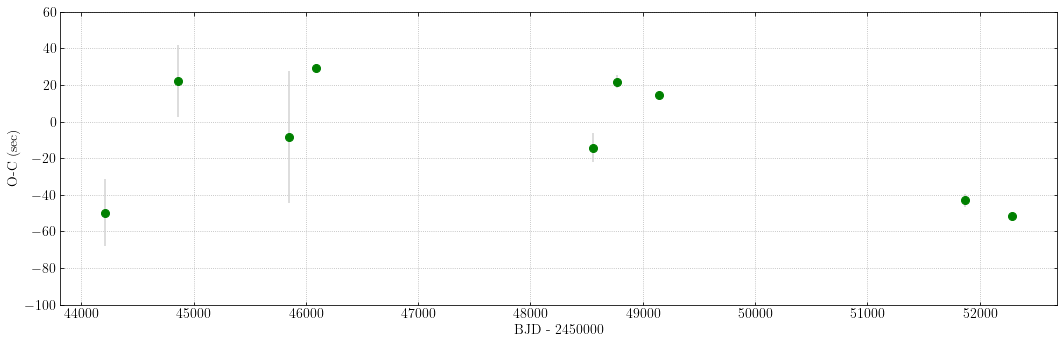

In [86]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_mean, y1_mean, yerr = dy1, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x2_mean, y2_mean, yerr = dy2, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x3_mean, y3_mean, yerr = dy3, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x4_mean, y4_mean, yerr = dy4, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x5_mean, y5_mean, yerr = dy5, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x6_mean, y6_mean, yerr = dy6, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x7_mean, y7_mean, yerr = dy7, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x8_mean, y8_mean, yerr = dy8, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x9_mean, y9_mean, yerr = dy9, fmt='o', markersize=8, color='green',ecolor='lightgray',)

#Schwope_2002
#plt.text(x1_mean, 62, '1979')
#plt.text(x2_mean, 62, '1981')
#plt.text(x3_mean-30, 62, '1984')
#plt.text(x4_mean+30, 62, '1985')
#plt.text(x5_mean-100, 62, '1991')
#plt.text(x6_mean, 62, '1992')
#plt.text(x7_mean, 62, '1993')
#plt.text(x8_mean, 62, '2000')
#plt.text(x9_mean, 62, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

In [87]:
#Input file: Beuermann_2011
DP_Leo_Beuermann_2011 = open("Beuermann_2011.dat",'r').readlines()
N_dpleo_Beuermann_2011 = len(DP_Leo_Beuermann_2011)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Beuermann_2011.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [88]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Beuermann_2011))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Beuermann_2011)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 54914.83228 2009-03-24 19:58:28.992017
1 54914.894663 2009-03-24 21:28:18.883201
2 54916.827926 2009-03-26 19:52:12.806409
3 54919.696603 2009-03-29 16:43:06.499214
4 54920.756784 2009-03-30 18:09:46.137597
5 54922.627668 2009-04-01 15:03:50.515184
6 54922.690017 2009-04-01 16:33:37.468786
7 54922.752365 2009-04-01 18:03:24.336006
8 54922.814727 2009-04-01 19:33:12.412796
9 54937.781831 2009-04-16 18:45:50.198400
10 54937.844195 2009-04-16 20:15:38.447991
11 54938.717285 2009-04-17 17:12:53.423981
12 54938.779611 2009-04-17 18:42:38.390387
13 54940.650507 2009-04-19 15:36:43.804783
14 54940.712869 2009-04-19 17:06:31.881613
15 54940.775243 2009-04-19 18:36:20.995211
16 54940.837637 2009-04-19 20:06:11.836781
17 54941.773045 2009-04-20 18:33:11.088013
18 54941.835408 2009-04-20 20:02:59.251183
19 54942.646122 2009-04-21 15:30:24.940815
20 54942.770852 2009-04-21 18:30:01.612798
21 54942.833221 2009-04-21 19:59:50.294413
22 54942.895591 2009-04-21 21:29:39.062408
23 54943.706304 2009-0

In [89]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT_err = [i for i in range(N_dpleo_Beuermann_2011)]
E_af = [i for i in range(N_dpleo_Beuermann_2011)] #float number
E_ak = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
E_aj = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
P_aE = [i for i in range(N_dpleo_Beuermann_2011)]
P_err_aE = [i for i in range(N_dpleo_Beuermann_2011)]
T_aC_linear = [i for i in range(N_dpleo_Beuermann_2011)]
T_aO_linear = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_a = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_std_a = [i for i in range(N_dpleo_Beuermann_2011)]

In [90]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Beuermann_2011):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 2
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Beuermann_2011.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2454914.832280	98482	54914.832280	54914.832604	-28.012457	1.036546
1	2454914.894663	98483	54914.894663	54914.894967	-26.271108	1.209346
2	2454916.827926	98514	54916.827926	54916.828215	-24.993300	1.468546
3	2454919.696603	98560	54919.696603	54919.696906	-26.193663	1.468546
4	2454920.756784	98577	54920.756784	54920.757075	-25.102735	1.382146
5	2454922.627668	98607	54922.627668	54922.627960	-25.220675	1.382146
6	2454922.690017	98608	54922.690017	54922.690323	-26.416927	0.863746
7	2454922.752365	98609	54922.752365	54922.752686	-27.699578	0.863746
8	2454922.814727	98610	54922.814727	54922.815048	-27.772630	0.950146
9	2454937.781831	98850	54937.781831	54937.782131	-25.951353	1.382146
10	2454937.844195	98851	54937.844195	54937.844494	-25.851604	1.036546
11	2454938.717285	98865	54938.717285	54938.717574	-24.973523	1.295746
12	2454938.779611	98866	54938.779611	54938.779937	-28.156974	0.863746
13	2454940.650507	98896	54940.65

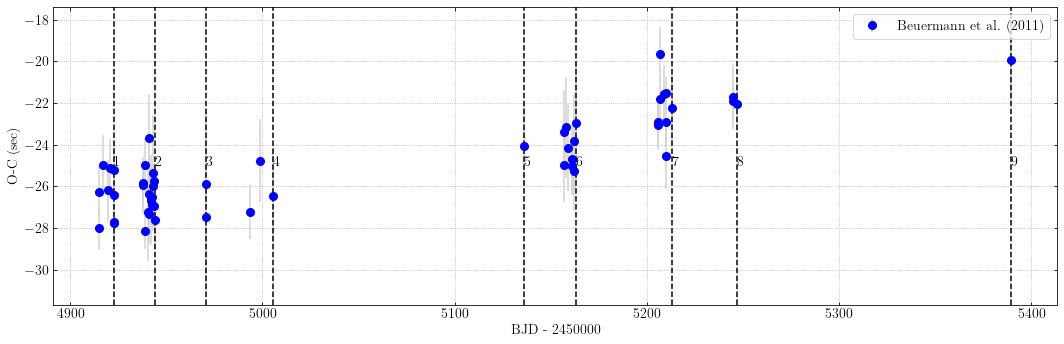

In [91]:
#Plot O-C vs BJD
Input_Beuermann_2011  = 'Beuermann_2011.out'
Data_Beuermann_2011   = np.genfromtxt(Input_Beuermann_2011)

N = 2450000
BJD_time_Beuermann_2011 = Data_Beuermann_2011[:,0] - N
Cycle_Beuermann_2011 = Data_Beuermann_2011[:,1]
T_O_linear_Beuermann_2011 = Data_Beuermann_2011[:,2]
T_C_linear_Beuermann_2011 = Data_Beuermann_2011[:,3]
OC_s_Beuermann_2011= Data_Beuermann_2011[:,4]
OC_s_err_Beuermann_2011 = Data_Beuermann_2011[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Beuermann_2011)
x2 = max(BJD_time_Beuermann_2011)
plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
#plt.text(BJD_time_Beuermann_2011[0], 38, '2002')
#plt.text(BJD_time_Beuermann_2011[1], 38, '2009')
#plt.text(BJD_time_Beuermann_2011[42], 38, '2010')

plt.axvline(x= BJD_time_Beuermann_2011[8], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[25], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[27], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[30], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[31], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[40], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[49], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[52], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[53], color='k', linestyle='--')

plt.text(BJD_time_Beuermann_2011[8], -25, '1')
plt.text(BJD_time_Beuermann_2011[25], -25, '2')
plt.text(BJD_time_Beuermann_2011[27], -25, '3')
plt.text(BJD_time_Beuermann_2011[30], -25, '4')
plt.text(BJD_time_Beuermann_2011[31], -25, '5')
plt.text(BJD_time_Beuermann_2011[40], -25, '6')
plt.text(BJD_time_Beuermann_2011[49], -25, '7')
plt.text(BJD_time_Beuermann_2011[52], -25, '8')
plt.text(BJD_time_Beuermann_2011[53], -25, '9')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Beuermann_2011.jpg", dpi=1000)
plt.show()

In [92]:
#Checkinng month,year from BJD
BJD_time = Data_Beuermann_2011[:,0] - 2400000
OC_s = Data_Beuermann_2011[:,4]
OC_s_err = Data_Beuermann_2011[:,5]


gp10 = []
gp11 = []
gp12 = []
gp13 = []
gp14 = []
gp15 = []
gp16 = []
gp17 = []
gp18 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[8] >= BJD_time[i]:        #gp10
        gp10.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[25] >= BJD_time[i]:       #gp11
        gp11.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[27] >= BJD_time[i]:       #gp12
        gp12.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[30] >= BJD_time[i]:       #gp13
        gp13.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp14
        gp14.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[40] >= BJD_time[i]:       #gp15
        gp15.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[49] >= BJD_time[i]:       #gp16
        gp16.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[52] >= BJD_time[i]:       #gp17
        gp17.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[53] >= BJD_time[i]:       #gp18
        gp18.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    
#-------------------------- Group10 -----------#        
rerults = gp10
f = open('Weighted_mean_calculation_gp10.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group11 -----------#        
rerults = gp11
f = open('Weighted_mean_calculation_gp11.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group12 -----------#        
rerults = gp12
f = open('Weighted_mean_calculation_gp12.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group13 -----------#        
rerults = gp13
f = open('Weighted_mean_calculation_gp13.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group14 -----------#        
rerults = gp14
f = open('Weighted_mean_calculation_gp14.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group15 -----------#        
rerults = gp15
f = open('Weighted_mean_calculation_gp15.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group16 -----------#        
rerults = gp16
f = open('Weighted_mean_calculation_gp16.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group17 -----------#        
rerults = gp17
f = open('Weighted_mean_calculation_gp17.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group18 -----------#        
rerults = gp18
f = open('Weighted_mean_calculation_gp18.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 2009-03-24 19:58:28.992017 54914.832280000206 -28.012457 1.036546
1 2009-03-24 21:28:18.883201 54914.894663000014 -26.271108 1.209346
2 2009-03-26 19:52:12.806409 54916.827926000115 -24.9933 1.468546
3 2009-03-29 16:43:06.499214 54919.696603000164 -26.193663 1.468546
4 2009-03-30 18:09:46.137597 54920.75678399997 -25.102735 1.382146
5 2009-04-01 15:03:50.515184 54922.62766799983 -25.220675 1.382146
6 2009-04-01 16:33:37.468786 54922.69001699984 -26.416927 0.863746
7 2009-04-01 18:03:24.336006 54922.75236500008 -27.699578 0.863746
8 2009-04-01 19:33:12.412796 54922.81472699996 -27.77263 0.950146
9 2009-04-16 18:45:50.198400 54937.781831 -25.951353 1.382146
10 2009-04-16 20:15:38.447991 54937.844194999896 -25.851604 1.036546
11 2009-04-17 17:12:53.423981 54938.71728499979 -24.973523 1.295746
12 2009-04-17 18:42:38.390387 54938.77961099986 -28.156974 0.863746
13 2009-04-19 15:36:43.804783 54940.65050699981 -27.238115 2.332546
14 2

In [93]:
#The 10th set of data point:
Input_gp10 = "Weighted_mean_calculation_gp10.txt"
Data_gp10   = np.genfromtxt(Input_gp10)
N_data_gp10 = len(Data_gp10)
print('Number of data group#10:',N_data_gp10)

#The 11th set of data point:
Input_gp11 = "Weighted_mean_calculation_gp11.txt"
Data_gp11   = np.genfromtxt(Input_gp11)
N_data_gp11 = len(Data_gp11)
print('Number of data group#11:',N_data_gp11)

#The 12th set of data point:
Input_gp12 = "Weighted_mean_calculation_gp12.txt"
Data_gp12   = np.genfromtxt(Input_gp12)
N_data_gp12 = len(Data_gp12)
print('Number of data group#12:',N_data_gp12)

#The 13th set of data point:
Input_gp13 = "Weighted_mean_calculation_gp13.txt"
Data_gp13   = np.genfromtxt(Input_gp13)
N_data_gp13 = len(Data_gp13)
print('Number of data group#13:',N_data_gp13)

#The 14th set of data point:
Input_gp14 = "Weighted_mean_calculation_gp14.txt"
Data_gp14   = np.genfromtxt(Input_gp14)
N_data_gp14 = len(Data_gp14)
print('Number of data group#14:',N_data_gp14)

#The 15th set of data point:
Input_gp15 = "Weighted_mean_calculation_gp15.txt"
Data_gp15   = np.genfromtxt(Input_gp15)
N_data_gp15 = len(Data_gp15)
print('Number of data group#15:',N_data_gp15)

#The 16th set of data point:
Input_gp16 = "Weighted_mean_calculation_gp16.txt"
Data_gp16   = np.genfromtxt(Input_gp16)
N_data_gp16 = len(Data_gp16)
print('Number of data group#16:',N_data_gp16)

#The 17th set of data point:
Input_gp17 = "Weighted_mean_calculation_gp17.txt"
Data_gp17   = np.genfromtxt(Input_gp17)
N_data_gp17 = len(Data_gp17)
print('Number of data group#17:',N_data_gp17)

#The 18th set of data point:
Input_gp18 = "Weighted_mean_calculation_gp18.txt"
Data_gp18   = np.genfromtxt(Input_gp18)
N_data_gp18 = len(Data_gp18)
print('Number of data group#18:',N_data_gp18)

Number of data group#10: 9
Number of data group#11: 17
Number of data group#12: 2
Number of data group#13: 3
Number of data group#14: 3
Number of data group#15: 9
Number of data group#16: 9
Number of data group#17: 3
Number of data group#18: 3


In [94]:
#Group10
BJD_time_a10 = [i for i in range(N_data_gp10)]
OC_s_a10 = [i for i in range(N_data_gp10)]
OC_err_s_a10 = [i for i in range(N_data_gp10)]

for i in range(N_data_gp10):
    BJD_time = Data_gp10[:,0]                   #Input file of x
    BJD_time_a10[i] = BJD_time
    OC_s = Data_gp10[:,1]                       #Input file of y
    OC_s_a10[i] = OC_s 
    OC_s_err = Data_gp10[:,2]                   #Input file of y_err
    OC_err_s_a10[i] = OC_s_err
    len_OC_s_a10 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a10[i])/len_OC_s_a10    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a10[i])/len_OC_s_a10               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a10[i]**2))/len_OC_s_a10   #Calculate the error propagation od OC

x10_mean = BJD_time_mean                  
y10_mean = y_mean                         
dy10 = dy                 
print('Mean BJD:', x10_mean)               #Print Mean BJD
print('Mean OC:', y10_mean)                #Print the weighted mean
print('Mean OC_err:',dy10)                 #Print the error of the weighted mean

Mean BJD: 54919.76589255557
Mean OC: -26.40923033333333
Mean OC_err: 0.4016285816129679


In [95]:
#Group11
BJD_time_a11 = [i for i in range(N_data_gp11)]
OC_s_a11 = [i for i in range(N_data_gp11)]
OC_err_s_a11 = [i for i in range(N_data_gp11)]

for i in range(N_data_gp11):
    BJD_time = Data_gp11[:,0]                   #Input file of x
    BJD_time_a11[i] = BJD_time
    OC_s = Data_gp11[:,1]                       #Input file of y
    OC_s_a11[i] = OC_s 
    OC_s_err = Data_gp11[:,2]                   #Input file of y_err
    OC_err_s_a11[i] = OC_s_err
    len_OC_s_a11 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a11[i])/len_OC_s_a11    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a11[i])/len_OC_s_a11               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a11[i]**2))/len_OC_s_a11   #Calculate the error propagation od OC

x11_mean = BJD_time_mean                  
y11_mean = y_mean                         
dy11 = dy                 
print('Mean BJD:', x11_mean)               #Print Mean BJD
print('Mean OC:', y11_mean)                #Print the weighted mean
print('Mean OC_err:',dy11)                 #Print the error of the weighted mean

Mean BJD: 54941.303493058804
Mean OC: -26.34107594117647
Mean OC_err: 0.3843921258369368


In [96]:
#Group12
BJD_time_a12 = [i for i in range(N_data_gp12)]
OC_s_a12 = [i for i in range(N_data_gp12)]
OC_err_s_a12 = [i for i in range(N_data_gp12)]

for i in range(N_data_gp12):
    BJD_time = Data_gp12[:,0]                   #Input file of x
    BJD_time_a12[i] = BJD_time
    OC_s = Data_gp12[:,1]                       #Input file of y
    OC_s_a12[i] = OC_s 
    OC_s_err = Data_gp12[:,2]                   #Input file of y_err
    OC_err_s_a12[i] = OC_s_err
    len_OC_s_a12 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a12[i])/len_OC_s_a12    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a12[i])/len_OC_s_a12               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a12[i]**2))/len_OC_s_a12   #Calculate the error propagation od OC

x12_mean = BJD_time_mean                  
y12_mean = y_mean                         
dy12 = dy                 
print('Mean BJD:', x12_mean)               #Print Mean BJD
print('Mean OC:', y12_mean)                #Print the weighted mean
print('Mean OC_err:',dy12)                 #Print the error of the weighted mean

Mean BJD: 54970.67822350003
Mean OC: -26.6859385
Mean OC_err: 2.5354064940080123


In [97]:
#Group13
BJD_time_a13 = [i for i in range(N_data_gp13)]
OC_s_a13 = [i for i in range(N_data_gp13)]
OC_err_s_a13 = [i for i in range(N_data_gp13)]

for i in range(N_data_gp13):
    BJD_time = Data_gp13[:,0]                   #Input file of x
    BJD_time_a13[i] = BJD_time
    OC_s = Data_gp13[:,1]                       #Input file of y
    OC_s_a13[i] = OC_s 
    OC_s_err = Data_gp13[:,2]                   #Input file of y_err
    OC_err_s_a13[i] = OC_s_err
    len_OC_s_a13 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a13[i])/len_OC_s_a13    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a13[i])/len_OC_s_a13               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a13[i]**2))/len_OC_s_a13   #Calculate the error propagation od OC

x13_mean = BJD_time_mean                  
y13_mean = y_mean                         
dy13 = dy                 
print('Mean BJD:', x13_mean)               #Print Mean BJD
print('Mean OC:', y13_mean)                #Print the weighted mean
print('Mean OC_err:',dy13)                 #Print the error of the weighted mean

Mean BJD: 54999.313169666566
Mean OC: -26.143882
Mean OC_err: 1.088938522739155


In [98]:
#Group14
x14_mean = 55135.970976000186 
y14_mean = -33.433291
dy14 = 2.382580

In [99]:
#Group15
BJD_time_a15 = [i for i in range(N_data_gp15)]
OC_s_a15 = [i for i in range(N_data_gp15)]
OC_err_s_a15 = [i for i in range(N_data_gp15)]

for i in range(N_data_gp15):
    BJD_time = Data_gp15[:,0]                   #Input file of x
    BJD_time_a15[i] = BJD_time
    OC_s = Data_gp15[:,1]                       #Input file of y
    OC_s_a15[i] = OC_s 
    OC_s_err = Data_gp15[:,2]                   #Input file of y_err
    OC_err_s_a15[i] = OC_s_err
    len_OC_s_a15 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a15[i])/len_OC_s_a15    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a15[i])/len_OC_s_a15               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a15[i]**2))/len_OC_s_a15   #Calculate the error propagation od OC

x15_mean = BJD_time_mean                  
y15_mean = y_mean                         
dy15 = dy                 
print('Mean BJD:', x15_mean)               #Print Mean BJD
print('Mean OC:', y15_mean)                #Print the weighted mean
print('Mean OC_err:',dy15)                 #Print the error of the weighted mean

Mean BJD: 55159.94602433333
Mean OC: -24.151118444444442
Mean OC_err: 0.6902499788495309


In [100]:
#Group16
BJD_time_a16 = [i for i in range(N_data_gp16)]
OC_s_a16 = [i for i in range(N_data_gp16)]
OC_err_s_a16 = [i for i in range(N_data_gp16)]

for i in range(N_data_gp16):
    BJD_time = Data_gp16[:,0]                   #Input file of x
    BJD_time_a16[i] = BJD_time
    OC_s = Data_gp16[:,1]                       #Input file of y
    OC_s_a16[i] = OC_s 
    OC_s_err = Data_gp16[:,2]                   #Input file of y_err
    OC_err_s_a16[i] = OC_s_err
    len_OC_s_a16 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a16[i])/len_OC_s_a16    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a16[i])/len_OC_s_a16               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a16[i]**2))/len_OC_s_a16   #Calculate the error propagation od OC

x16_mean = BJD_time_mean                  
y16_mean = y_mean                         
dy16 = dy                 
print('Mean BJD:', x16_mean)               #Print Mean BJD
print('Mean OC:', y16_mean)                #Print the weighted mean
print('Mean OC_err:',dy16)                 #Print the error of the weighted mean

Mean BJD: 55208.61678266665
Mean OC: -22.248436555555557
Mean OC_err: 0.4269820401786369


In [101]:
#Group17
BJD_time_a17 = [i for i in range(N_data_gp17)]
OC_s_a17 = [i for i in range(N_data_gp17)]
OC_err_s_a17 = [i for i in range(N_data_gp17)]

for i in range(N_data_gp17):
    BJD_time = Data_gp17[:,0]                   #Input file of x
    BJD_time_a17[i] = BJD_time
    OC_s = Data_gp17[:,1]                       #Input file of y
    OC_s_a17[i] = OC_s 
    OC_s_err = Data_gp17[:,2]                   #Input file of y_err
    OC_err_s_a17[i] = OC_s_err
    len_OC_s_a17 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a17[i])/len_OC_s_a17    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a17[i])/len_OC_s_a17               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a17[i]**2))/len_OC_s_a17   #Calculate the error propagation od OC

x17_mean = BJD_time_mean                  
y17_mean = y_mean                         
dy17 = dy                 
print('Mean BJD:', x17_mean)               #Print Mean BJD
print('Mean OC:', y17_mean)                #Print the weighted mean
print('Mean OC_err:',dy17)                 #Print the error of the weighted mean

Mean BJD: 55245.62567099991
Mean OC: -21.891552666666666
Mean OC_err: 0.7335508701551197


In [102]:
#Group18
x18_mean = 55389.663079000078 
y18_mean = -28.309494 
dy18 = 2.197910

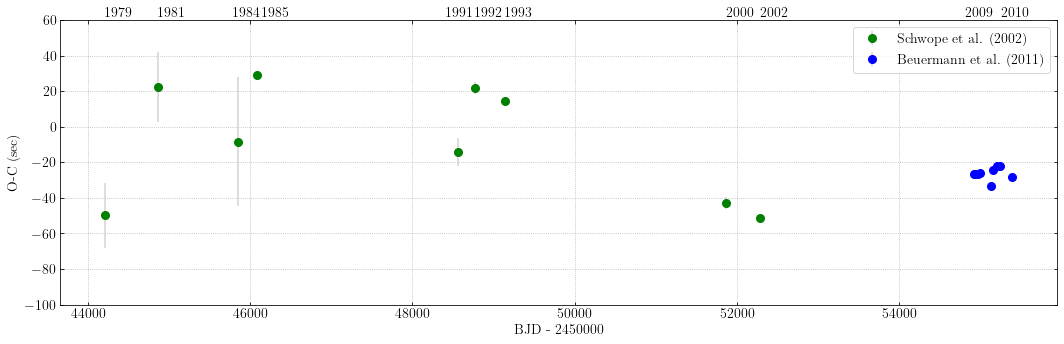

In [103]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_mean, y1_mean, yerr = dy1, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_mean, y2_mean, yerr = dy2, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_mean, y3_mean, yerr = dy3, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_mean, y4_mean, yerr = dy4, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_mean, y5_mean, yerr = dy5, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_mean, y6_mean, yerr = dy6, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_mean, y7_mean, yerr = dy7, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_mean, y8_mean, yerr = dy8, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_mean, y9_mean, yerr = dy9, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_mean, y10_mean, yerr = dy10, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_mean, y11_mean, yerr = dy11, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_mean, y12_mean, yerr = dy12, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_mean, y13_mean, yerr = dy13, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_mean, y14_mean, yerr = dy14, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_mean, y15_mean, yerr = dy15, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_mean, y16_mean, yerr = dy16, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_mean, y17_mean, yerr = dy17, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_mean, y18_mean, yerr = dy18, fmt='o', markersize=8, color='blue',ecolor='lightgray')



#Schwope_2002
plt.text(x1_mean, 62, '1979')
plt.text(x2_mean, 62, '1981')
plt.text(x3_mean-60, 62, '1984')
plt.text(x4_mean+60, 62, '1985')
plt.text(x5_mean-150, 62, '1991')
plt.text(x6_mean, 62, '1992')
plt.text(x7_mean, 62, '1993')
plt.text(x8_mean, 62, '2000')
plt.text(x9_mean, 62, '2002')

plt.text(x10_mean-100, 62, '2009')
plt.text(x16_mean+50, 62, '2010')
#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

In [104]:
#Input file: Beuermann_2011
DP_Leo_Kittipong_2020 = open("Kittipong_2020.dat",'r').readlines()
N_dpleo_Kittipong_2020 = len(DP_Leo_Kittipong_2020)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Kittipong_2020.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [105]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Kittipong_2020))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Kittipong_2020)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56670.34677356 2014-01-13 08:19:21.235597
1 56717.36835247 2014-03-01 08:50:25.653406
2 56748.30036724 2014-04-01 07:12:31.729524
3 57100.33871551 2015-03-19 08:07:45.020062
4 57101.14945633 2015-03-20 03:35:13.026921
5 57748.28884756 2016-12-26 06:55:56.429189
6 57748.35119104 2016-12-26 08:25:42.905867
7 57802.23271517 2017-02-18 05:35:06.590679
8 57802.41981902 2017-02-18 10:04:32.363345
9 57829.36056651 2017-03-17 08:39:12.946454
10 58140.42647328 2018-01-22 10:14:07.291387
11 58200.23245417 2018-03-23 05:34:44.040288
12 58542.41740511 2019-02-28 10:01:03.801491
13 58580.0845501 2019-04-07 02:01:45.128632
14 58851.30060629 2020-01-03 07:12:52.383445
15 58870.25888747 2020-01-22 06:12:47.877388
16 58870.38363828 2020-01-22 09:12:26.347390
17 58871.1943114 2020-01-23 04:39:48.504955
18 58871.2567542 2020-01-23 06:09:43.562877
19 58873.31469828 2020-01-25 07:33:09.931377
20 58873.4394328 2020-01-25 10:32:46.993904
21 58880.17462731 2020-02-01 04:11:27.799595
22 58909.29802913 2020-0

In [106]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT_err = [i for i in range(N_dpleo_Kittipong_2020)]
E_af = [i for i in range(N_dpleo_Kittipong_2020)] #float number
E_ak = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
E_aj = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
P_aE = [i for i in range(N_dpleo_Kittipong_2020)]
P_err_aE = [i for i in range(N_dpleo_Kittipong_2020)]
T_aC_linear = [i for i in range(N_dpleo_Kittipong_2020)]
T_aO_linear = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_a = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_std_a = [i for i in range(N_dpleo_Kittipong_2020)]

In [107]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Kittipong_2020):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Kittipong_2020.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2456670.346774	126632	56670.346774	56670.346705	5.915705	2.825026
1	2456717.368352	127386	56717.368352	56717.368291	5.345614	2.816386
2	2456748.300367	127882	56748.300367	56748.300262	9.095474	1.269826
3	2457100.338716	133527	57100.338716	57100.338525	16.475148	2.315266
4	2457101.149456	133540	57101.149456	57101.149242	18.533928	3.058306
5	2457748.288848	143917	57748.288848	57748.288490	30.928771	1.554946
6	2457748.351191	143918	57748.351191	57748.350852	29.255592	1.563586
7	2457802.232715	144782	57802.232715	57802.232351	31.468860	2.539906
8	2457802.419819	144785	57802.419819	57802.419439	32.791945	2.341186
9	2457829.360567	145217	57829.360567	57829.360189	32.639299	3.023746
10	2458140.426473	150205	58140.426473	58140.426062	35.525708	2.073346
11	2458200.232454	151164	58200.232454	58200.232031	36.567162	2.185666
12	2458542.417405	156651	58542.417405	58542.416964	38.094037	3.991426
13	2458580.084550	157255	58580.0845

In [108]:
#Plot O-C vs BJD
Input_Kittipong_2020  = 'Kittipong_2020.out'
Data_Kittipong_2020   = np.genfromtxt(Input_Kittipong_2020)

N = 2450000
BJD_time_Kittipong_2020 = Data_Kittipong_2020[:,0] - 2400000
Cycle_Kittipong_2020 = Data_Kittipong_2020[:,1]
T_O_linear_Kittipong_2020 = Data_Kittipong_2020[:,2]
T_C_linear_Kittipong_2020 = Data_Kittipong_2020[:,3]
OC_s_Kittipong_2020 = Data_Kittipong_2020[:,4]
OC_s_err_Kittipong_2020 = Data_Kittipong_2020[:,5]

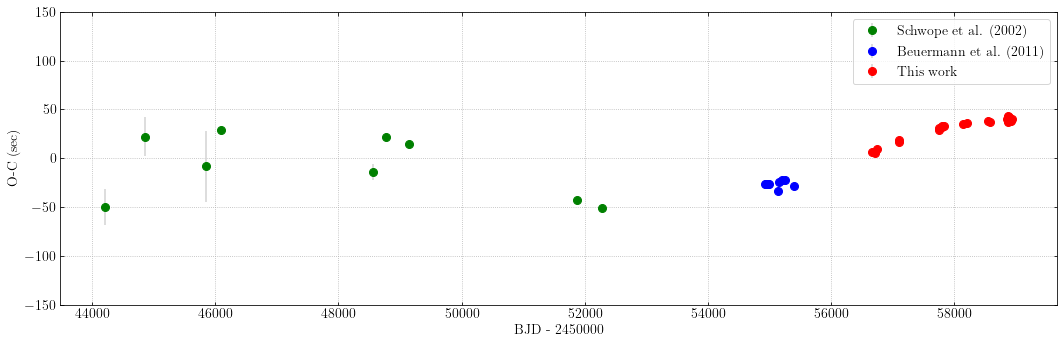

In [109]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

x1 = x1_mean - 2450000 + 2400000
x2 = x2_mean - 2450000 + 2400000
x3 = x3_mean - 2450000 + 2400000
x4 = x4_mean - 2450000 + 2400000
x5 = x5_mean - 2450000 + 2400000
x6 = x6_mean - 2450000 + 2400000
x7 = x7_mean - 2450000 + 2400000
x8 = x8_mean - 2450000 + 2400000
x9 = x9_mean - 2450000 + 2400000

x10 = x10_mean - 2450000 + 2400000
x11 = x11_mean - 2450000 + 2400000
x12 = x12_mean - 2450000 + 2400000
x13 = x13_mean - 2450000 + 2400000
x14 = x14_mean - 2450000 + 2400000
x15 = x15_mean - 2450000 + 2400000
x16 = x16_mean - 2450000 + 2400000
x17 = x17_mean - 2450000 + 2400000
x18 = x18_mean - 2450000 + 2400000

#print(x1)


plt.errorbar(x1_mean, y1_mean, yerr = dy1, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_mean, y2_mean, yerr = dy2, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_mean, y3_mean, yerr = dy3, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_mean, y4_mean, yerr = dy4, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_mean, y5_mean, yerr = dy5, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_mean, y6_mean, yerr = dy6, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_mean, y7_mean, yerr = dy7, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_mean, y8_mean, yerr = dy8, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_mean, y9_mean, yerr = dy9, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_mean, y10_mean, yerr = dy10, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_mean, y11_mean, yerr = dy11, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_mean, y12_mean, yerr = dy12, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_mean, y13_mean, yerr = dy13, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_mean, y14_mean, yerr = dy14, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_mean, y15_mean, yerr = dy15, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_mean, y16_mean, yerr = dy16, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_mean, y17_mean, yerr = dy17, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_mean, y18_mean, yerr = dy18, fmt='o', markersize=8, color='blue',ecolor='lightgray')

plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='red',ecolor='lightgray', label = 'This work')

#Schwope_2002
#plt.text(x1, 155, '1979')
#plt.text(x2, 155, '1981')
#plt.text(x3-150, 155, '1984')
#plt.text(x4+150, 155, '1985')
#plt.text(x5-250, 155, '1991')
#plt.text(x6+70, 155, '1992')
#plt.text(x7+200, 155, '1993')
#plt.text(x8-100, 155, '2000')
#plt.text(x9, 155, '2002')

#plt.text(x10-200, 155, '2009')
#plt.text(x16+50, 155, '2010')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 155, '2020')





#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.savefig("Weighted_mean_calculation_rev1.jpg", dpi=1000)
plt.show()

In [110]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Kittipong_2020))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Kittipong_2020)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56670.34677356 2014-01-13 08:19:21.235597
1 56717.36835247 2014-03-01 08:50:25.653406
2 56748.30036724 2014-04-01 07:12:31.729524
3 57100.33871551 2015-03-19 08:07:45.020062
4 57101.14945633 2015-03-20 03:35:13.026921
5 57748.28884756 2016-12-26 06:55:56.429189
6 57748.35119104 2016-12-26 08:25:42.905867
7 57802.23271517 2017-02-18 05:35:06.590679
8 57802.41981902 2017-02-18 10:04:32.363345
9 57829.36056651 2017-03-17 08:39:12.946454
10 58140.42647328 2018-01-22 10:14:07.291387
11 58200.23245417 2018-03-23 05:34:44.040288
12 58542.41740511 2019-02-28 10:01:03.801491
13 58580.0845501 2019-04-07 02:01:45.128632
14 58851.30060629 2020-01-03 07:12:52.383445
15 58870.25888747 2020-01-22 06:12:47.877388
16 58870.38363828 2020-01-22 09:12:26.347390
17 58871.1943114 2020-01-23 04:39:48.504955
18 58871.2567542 2020-01-23 06:09:43.562877
19 58873.31469828 2020-01-25 07:33:09.931377
20 58873.4394328 2020-01-25 10:32:46.993904
21 58880.17462731 2020-02-01 04:11:27.799595
22 58909.29802913 2020-0

In [111]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT_err = [i for i in range(N_dpleo_Kittipong_2020)]
E_af = [i for i in range(N_dpleo_Kittipong_2020)] #float number
E_ak = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
E_aj = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
P_aE = [i for i in range(N_dpleo_Kittipong_2020)]
P_err_aE = [i for i in range(N_dpleo_Kittipong_2020)]
T_aC_linear = [i for i in range(N_dpleo_Kittipong_2020)]
T_aO_linear = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_a = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_std_a = [i for i in range(N_dpleo_Kittipong_2020)]

In [112]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Kittipong_2020):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Kittipong_2020.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2456670.346774	126632	56670.346774	56670.346705	5.915705	2.825026
1	2456717.368352	127386	56717.368352	56717.368291	5.345614	2.816386
2	2456748.300367	127882	56748.300367	56748.300262	9.095474	1.269826
3	2457100.338716	133527	57100.338716	57100.338525	16.475148	2.315266
4	2457101.149456	133540	57101.149456	57101.149242	18.533928	3.058306
5	2457748.288848	143917	57748.288848	57748.288490	30.928771	1.554946
6	2457748.351191	143918	57748.351191	57748.350852	29.255592	1.563586
7	2457802.232715	144782	57802.232715	57802.232351	31.468860	2.539906
8	2457802.419819	144785	57802.419819	57802.419439	32.791945	2.341186
9	2457829.360567	145217	57829.360567	57829.360189	32.639299	3.023746
10	2458140.426473	150205	58140.426473	58140.426062	35.525708	2.073346
11	2458200.232454	151164	58200.232454	58200.232031	36.567162	2.185666
12	2458542.417405	156651	58542.417405	58542.416964	38.094037	3.991426
13	2458580.084550	157255	58580.0845

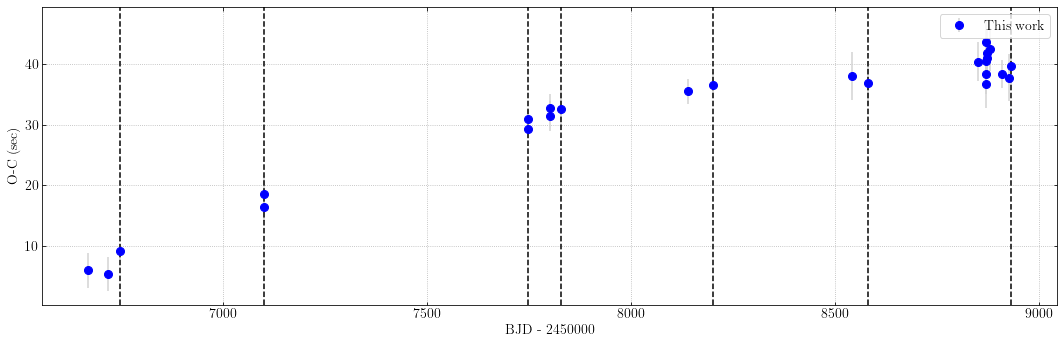

In [113]:
#Plot O-C vs BJD
Input_Kittipong_2020  = 'Kittipong_2020.out'
Data_Kittipong_2020   = np.genfromtxt(Input_Kittipong_2020)

N = 2450000
BJD_time_Kittipong_2020 = Data_Kittipong_2020[:,0] - N
Cycle_Kittipong_2020 = Data_Kittipong_2020[:,1]
T_O_linear_Kittipong_2020 = Data_Kittipong_2020[:,2]
T_C_linear_Kittipong_2020 = Data_Kittipong_2020[:,3]
OC_s_Kittipong_2020 = Data_Kittipong_2020[:,4]
OC_s_err_Kittipong_2020 = Data_Kittipong_2020[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Kittipong_2020)
x2 = max(BJD_time_Kittipong_2020)
plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'This work')


plt.axvline(x= BJD_time_Kittipong_2020[2], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[4], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[6], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[9], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[11], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[13], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[24], color='k', linestyle='--')


#plt.text(BJD_time_Beuermann_2011[8], -25, '1')


#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Beuermann_2011.jpg", dpi=1000)
plt.show()

In [114]:
#Checkinng month,year from BJD
BJD_time = Data_Kittipong_2020[:,0] - 2400000
OC_s = Data_Kittipong_2020[:,4]
OC_s_err = Data_Kittipong_2020[:,5]


gp19 = []
gp20 = []
gp21 = []
gp22 = []
gp23 = []
gp24 = []
gp25 = []


print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[2] >= BJD_time[i]:        #gp19
        gp19.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[4] >= BJD_time[i]:       #gp20
        gp20.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[6] >= BJD_time[i]:       #gp21
        gp21.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[9] >= BJD_time[i]:       #gp22
        gp22.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[11] >= BJD_time[i]:       #gp23
        gp23.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[13] >= BJD_time[i]:       #gp23
        gp24.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[24] >= BJD_time[i]:       #gp24
        gp25.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))

#-------------------------- Group19 -----------#        
rerults = gp19
f = open('Weighted_mean_calculation_gp19.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group20 -----------#        
rerults = gp20
f = open('Weighted_mean_calculation_gp20.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group21 -----------#        
rerults = gp21
f = open('Weighted_mean_calculation_gp21.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group22 -----------#        
rerults = gp22
f = open('Weighted_mean_calculation_gp22.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group23 -----------#        
rerults = gp23
f = open('Weighted_mean_calculation_gp23.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group24 -----------#        
rerults = gp24
f = open('Weighted_mean_calculation_gp24.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group25 -----------#        
rerults = gp25
f = open('Weighted_mean_calculation_gp25.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 2014-01-13 08:19:21.273618 56670.34677400021 5.915705 2.825026
1 2014-03-01 08:50:25.612811 56717.368352000136 5.345614 2.816386
2 2014-04-01 07:12:31.708804 56748.30036700005 9.095474 1.269826
3 2015-03-19 08:07:45.062387 57100.33871599985 16.475148 2.315266
4 2015-03-20 03:35:12.998396 57101.149455999956 18.533928 3.058306
5 2016-12-26 06:55:56.467209 57748.28884800011 30.928771 1.554946
6 2016-12-26 08:25:42.902407 57748.35119100008 29.255592 1.563586
7 2017-02-18 05:35:06.575994 57802.23271499993 31.46886 2.539906
8 2017-02-18 10:04:32.361615 57802.41981900018 32.791945 2.341186
9 2017-03-17 08:39:12.988819 57829.36056700023 32.639299 3.023746
10 2018-01-22 10:14:07.267207 58140.42647300009 35.525708 2.073346
11 2018-03-23 05:34:44.025603 58200.23245400004 36.567162 2.185666
12 2019-02-28 10:01:03.791996 58542.41740499996 38.094037 3.991426
13 2019-04-07 02:01:45.119982 58580.084549999796 36.91096 3.654466
14 2020-01-03 07:

In [115]:
#The 19th set of data point:
Input_gp19 = "Weighted_mean_calculation_gp19.txt"
Data_gp19   = np.genfromtxt(Input_gp19)
N_data_gp19 = len(Data_gp19)
print('Number of data group#19:',N_data_gp19)

#The 20th set of data point:
Input_gp20 = "Weighted_mean_calculation_gp20.txt"
Data_gp20   = np.genfromtxt(Input_gp20)
N_data_gp20 = len(Data_gp20)
print('Number of data group#20:',N_data_gp20)

#The 21st set of data point:
Input_gp21 = "Weighted_mean_calculation_gp21.txt"
Data_gp21   = np.genfromtxt(Input_gp21)
N_data_gp21 = len(Data_gp21)
print('Number of data group#21:',N_data_gp21)

#The 22nd set of data point:
Input_gp22 = "Weighted_mean_calculation_gp22.txt"
Data_gp22   = np.genfromtxt(Input_gp22)
N_data_gp22 = len(Data_gp22)
print('Number of data group#22:',N_data_gp22)

#The 23rd set of data point:
Input_gp23 = "Weighted_mean_calculation_gp23.txt"
Data_gp23   = np.genfromtxt(Input_gp23)
N_data_gp23 = len(Data_gp23)
print('Number of data group#23:',N_data_gp23)

#The 24th set of data point:
Input_gp24 = "Weighted_mean_calculation_gp24.txt"
Data_gp24   = np.genfromtxt(Input_gp24)
N_data_gp24 = len(Data_gp24)
print('Number of data group#24:',N_data_gp24)

#The 25th set of data point:
Input_gp25 = "Weighted_mean_calculation_gp25.txt"
Data_gp25   = np.genfromtxt(Input_gp25)
N_data_gp25 = len(Data_gp25)
print('Number of data group#25:',N_data_gp25)

Number of data group#19: 3
Number of data group#20: 2
Number of data group#21: 2
Number of data group#22: 3
Number of data group#23: 2
Number of data group#24: 2
Number of data group#25: 11


In [116]:
#Group19
BJD_time_a19 = [i for i in range(N_data_gp19)]
OC_s_a19 = [i for i in range(N_data_gp19)]
OC_err_s_a19 = [i for i in range(N_data_gp19)]

for i in range(N_data_gp19):
    BJD_time = Data_gp19[:,0]                   #Input file of x
    BJD_time_a19[i] = BJD_time
    OC_s = Data_gp19[:,1]                       #Input file of y
    OC_s_a19[i] = OC_s 
    OC_s_err = Data_gp19[:,2]                   #Input file of y_err
    OC_err_s_a19[i] = OC_s_err
    len_OC_s_a19 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a19[i])/len_OC_s_a19    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a19[i])/len_OC_s_a19               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a19[i]**2))/len_OC_s_a19   #Calculate the error propagation od OC

x19_mean = BJD_time_mean                  
y19_mean = y_mean                         
dy19 = dy                 
print('Mean BJD:', x19_mean)               #Print Mean BJD
print('Mean OC:', y19_mean)                #Print the weighted mean
print('Mean OC_err:',dy19)                 #Print the error of the weighted mean

Mean BJD: 56712.00516433347
Mean OC: 6.785597666666667
Mean OC_err: 1.3954394000118144


In [117]:
#Group20
BJD_time_a20 = [i for i in range(N_data_gp20)]
OC_s_a20 = [i for i in range(N_data_gp20)]
OC_err_s_a20 = [i for i in range(N_data_gp20)]

for i in range(N_data_gp20):
    BJD_time = Data_gp20[:,0]                   #Input file of x
    BJD_time_a20[i] = BJD_time
    OC_s = Data_gp20[:,1]                       #Input file of y
    OC_s_a20[i] = OC_s 
    OC_s_err = Data_gp20[:,2]                   #Input file of y_err
    OC_err_s_a20[i] = OC_s_err
    len_OC_s_a20 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a20[i])/len_OC_s_a20    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a20[i])/len_OC_s_a20               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a20[i]**2))/len_OC_s_a20   #Calculate the error propagation od OC

x20_mean = BJD_time_mean                  
y20_mean = y_mean                         
dy20 = dy                 
print('Mean BJD:', x20_mean)               #Print Mean BJD
print('Mean OC:', y20_mean)                #Print the weighted mean
print('Mean OC_err:',dy20)                 #Print the error of the weighted mean

Mean BJD: 57100.744085999904
Mean OC: 17.504538
Mean OC_err: 1.9179215469090491


In [118]:
#Group21
BJD_time_a21 = [i for i in range(N_data_gp21)]
OC_s_a21 = [i for i in range(N_data_gp21)]
OC_err_s_a21 = [i for i in range(N_data_gp21)]

for i in range(N_data_gp21):
    BJD_time = Data_gp21[:,0]                   #Input file of x
    BJD_time_a21[i] = BJD_time
    OC_s = Data_gp21[:,1]                       #Input file of y
    OC_s_a21[i] = OC_s 
    OC_s_err = Data_gp21[:,2]                   #Input file of y_err
    OC_err_s_a21[i] = OC_s_err
    len_OC_s_a21 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a21[i])/len_OC_s_a21    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a21[i])/len_OC_s_a21               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a21[i]**2))/len_OC_s_a21   #Calculate the error propagation od OC

x21_mean = BJD_time_mean                  
y21_mean = y_mean                         
dy21 = dy                 
print('Mean BJD:', x21_mean)               #Print Mean BJD
print('Mean OC:', y21_mean)                #Print the weighted mean
print('Mean OC_err:',dy21)                 #Print the error of the weighted mean

Mean BJD: 57748.3200195001
Mean OC: 30.092181500000002
Mean OC_err: 1.1025717938429225


In [119]:
#Group22
BJD_time_a22 = [i for i in range(N_data_gp22)]
OC_s_a22 = [i for i in range(N_data_gp22)]
OC_err_s_a22 = [i for i in range(N_data_gp22)]

for i in range(N_data_gp22):
    BJD_time = Data_gp22[:,0]                   #Input file of x
    BJD_time_a22[i] = BJD_time
    OC_s = Data_gp22[:,1]                       #Input file of y
    OC_s_a22[i] = OC_s 
    OC_s_err = Data_gp22[:,2]                   #Input file of y_err
    OC_err_s_a22[i] = OC_s_err
    len_OC_s_a22 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a22[i])/len_OC_s_a22    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a22[i])/len_OC_s_a22               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a22[i]**2))/len_OC_s_a22   #Calculate the error propagation od OC

x22_mean = BJD_time_mean                  
y22_mean = y_mean                         
dy22 = dy                 
print('Mean BJD:', x22_mean)               #Print Mean BJD
print('Mean OC:', y22_mean)                #Print the weighted mean
print('Mean OC_err:',dy22)                 #Print the error of the weighted mean

Mean BJD: 57811.337700333446
Mean OC: 32.30003466666667
Mean OC_err: 1.5302619328419997


In [120]:
#Group23
BJD_time_a23 = [i for i in range(N_data_gp23)]
OC_s_a23 = [i for i in range(N_data_gp23)]
OC_err_s_a23 = [i for i in range(N_data_gp23)]

for i in range(N_data_gp23):
    BJD_time = Data_gp23[:,0]                   #Input file of x
    BJD_time_a23[i] = BJD_time
    OC_s = Data_gp23[:,1]                       #Input file of y
    OC_s_a23[i] = OC_s 
    OC_s_err = Data_gp23[:,2]                   #Input file of y_err
    OC_err_s_a23[i] = OC_s_err
    len_OC_s_a23 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a23[i])/len_OC_s_a23    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a23[i])/len_OC_s_a23               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a23[i]**2))/len_OC_s_a23   #Calculate the error propagation od OC

x23_mean = BJD_time_mean                  
y23_mean = y_mean                         
dy23 = dy                 
print('Mean BJD:', x23_mean)               #Print Mean BJD
print('Mean OC:', y23_mean)                #Print the weighted mean
print('Mean OC_err:',dy23)                 #Print the error of the weighted mean

Mean BJD: 58170.329463500064
Mean OC: 36.046435
Mean OC_err: 1.5063116791746654


In [121]:
#Group24
BJD_time_a24 = [i for i in range(N_data_gp24)]
OC_s_a24 = [i for i in range(N_data_gp24)]
OC_err_s_a24 = [i for i in range(N_data_gp24)]

for i in range(N_data_gp24):
    BJD_time = Data_gp24[:,0]                   #Input file of x
    BJD_time_a24[i] = BJD_time
    OC_s = Data_gp24[:,1]                       #Input file of y
    OC_s_a24[i] = OC_s 
    OC_s_err = Data_gp24[:,2]                   #Input file of y_err
    OC_err_s_a24[i] = OC_s_err
    len_OC_s_a24 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a24[i])/len_OC_s_a24    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a24[i])/len_OC_s_a24               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a24[i]**2))/len_OC_s_a24   #Calculate the error propagation od OC

x24_mean = BJD_time_mean                  
y24_mean = y_mean                         
dy24 = dy                 
print('Mean BJD:', x24_mean)               #Print Mean BJD
print('Mean OC:', y24_mean)                #Print the weighted mean
print('Mean OC_err:',dy24)                 #Print the error of the weighted mean

Mean BJD: 58561.250977499876
Mean OC: 37.5024985
Mean OC_err: 2.7058549138226167


In [122]:
#Group25
BJD_time_a25 = [i for i in range(N_data_gp25)]
OC_s_a25 = [i for i in range(N_data_gp25)]
OC_err_s_a25 = [i for i in range(N_data_gp25)]

for i in range(N_data_gp25):
    BJD_time = Data_gp25[:,0]                   #Input file of x
    BJD_time_a25[i] = BJD_time
    OC_s = Data_gp25[:,1]                       #Input file of y
    OC_s_a25[i] = OC_s 
    OC_s_err = Data_gp25[:,2]                   #Input file of y_err
    OC_err_s_a25[i] = OC_s_err
    len_OC_s_a25 = len(OC_s)
    BJD_time_mean = np.sum(BJD_time_a25[i])/len_OC_s_a25    #Calculate the mean of BMJD
    y_mean = np.sum(OC_s_a25[i])/len_OC_s_a25               #Calculate the mean of OC
    dy = np.sqrt(np.sum(OC_err_s_a25[i]**2))/len_OC_s_a25   #Calculate the error propagation od OC

x25_mean = BJD_time_mean                  
y25_mean = y_mean                         
dy25 = dy                 
print('Mean BJD:', x25_mean)               #Print Mean BJD
print('Mean OC:', y25_mean)                #Print the weighted mean
print('Mean OC_err:',dy25)                 #Print the error of the weighted mean

Mean BJD: 58884.35291027269
Mean OC: 40.12220463636364
Mean OC_err: 0.9945018694650873


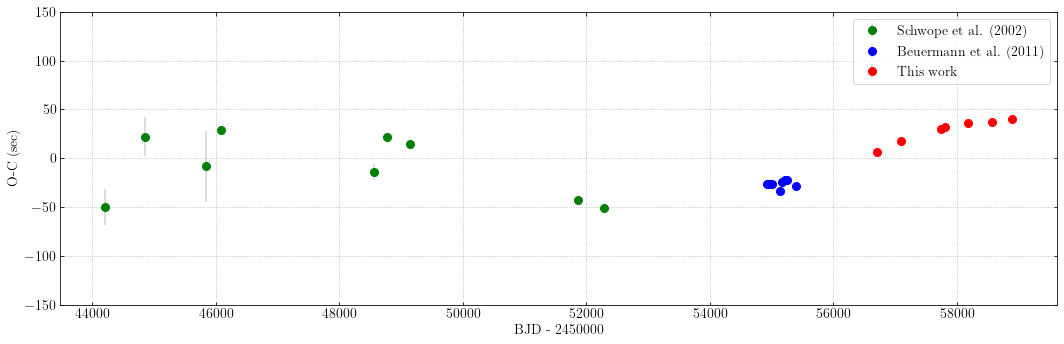

In [123]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

x1 = x1_mean - 2450000 + 2400000
x2 = x2_mean - 2450000 + 2400000
x3 = x3_mean - 2450000 + 2400000
x4 = x4_mean - 2450000 + 2400000
x5 = x5_mean - 2450000 + 2400000
x6 = x6_mean - 2450000 + 2400000
x7 = x7_mean - 2450000 + 2400000
x8 = x8_mean - 2450000 + 2400000
x9 = x9_mean - 2450000 + 2400000

x10 = x10_mean - 2450000 + 2400000
x11 = x11_mean - 2450000 + 2400000
x12 = x12_mean - 2450000 + 2400000
x13 = x13_mean - 2450000 + 2400000
x14 = x14_mean - 2450000 + 2400000
x15 = x15_mean - 2450000 + 2400000
x16 = x16_mean - 2450000 + 2400000
x17 = x17_mean - 2450000 + 2400000
x18 = x18_mean - 2450000 + 2400000

#print(x1)


plt.errorbar(x1_mean, y1_mean, yerr = dy1, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_mean, y2_mean, yerr = dy2, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_mean, y3_mean, yerr = dy3, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_mean, y4_mean, yerr = dy4, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_mean, y5_mean, yerr = dy5, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_mean, y6_mean, yerr = dy6, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_mean, y7_mean, yerr = dy7, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_mean, y8_mean, yerr = dy8, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_mean, y9_mean, yerr = dy9, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_mean, y10_mean, yerr = dy10, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_mean, y11_mean, yerr = dy11, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_mean, y12_mean, yerr = dy12, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_mean, y13_mean, yerr = dy13, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_mean, y14_mean, yerr = dy14, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_mean, y15_mean, yerr = dy15, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_mean, y16_mean, yerr = dy16, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_mean, y17_mean, yerr = dy17, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_mean, y18_mean, yerr = dy18, fmt='o', markersize=8, color='blue',ecolor='lightgray')

plt.errorbar(x19_mean, y19_mean, yerr = dy19, fmt='o', markersize=8, color='red',ecolor='lightgray', label = 'This work')
plt.errorbar(x20_mean, y20_mean, yerr = dy20, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x21_mean, y21_mean, yerr = dy21, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x22_mean, y22_mean, yerr = dy22, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x23_mean, y23_mean, yerr = dy23, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x24_mean, y24_mean, yerr = dy24, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x25_mean, y25_mean, yerr = dy25, fmt='o', markersize=8, color='red',ecolor='lightgray')

#Schwope_2002
#plt.text(x1, 155, '1979')
#plt.text(x2, 155, '1981')
#plt.text(x3-150, 155, '1984')
#plt.text(x4+150, 155, '1985')
#plt.text(x5-250, 155, '1991')
#plt.text(x6+70, 155, '1992')
#plt.text(x7+200, 155, '1993')
#plt.text(x8-100, 155, '2000')
#plt.text(x9, 155, '2002')

#plt.text(x10-200, 155, '2009')
#plt.text(x16+50, 155, '2010')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 155, '2020')





#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.savefig("Weighted_mean_calculation_rev1.jpg", dpi=1000)
plt.show()

In [124]:
#Input file: Beuermann_2011
DP_Leo_David_2012 = open("David_2012.dat",'r').readlines()
N_dpleo_David_2012 = len(DP_Leo_David_2012)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("David_2012.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [125]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_David_2012))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_David_2012)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56004.24921 2012-03-18 05:58:51.744003
1 56403.30917 2013-04-21 07:25:12.287981
2 56772.18547 2014-04-25 04:27:04.607992
3 57453.81143 2016-03-06 19:28:27.551980
4 57846.8222 2017-04-03 19:43:58.079984
5 58187.51041 2018-03-10 12:14:59.424009
6 58593.24301 2019-04-20 05:49:56.063987
7 58934.11856 2020-03-26 02:50:43.583987
8 59317.08867 2021-04-13 02:07:41.087997


In [126]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_David_2012)]
Delta_aT = [i for i in range(N_dpleo_David_2012)]
Delta_aT_err = [i for i in range(N_dpleo_David_2012)]
E_af = [i for i in range(N_dpleo_David_2012)] #float number
E_ak = [i for i in range(N_dpleo_David_2012)] #integer number
E_aj = [i for i in range(N_dpleo_David_2012)] #integer number
P_aE = [i for i in range(N_dpleo_David_2012)]
P_err_aE = [i for i in range(N_dpleo_David_2012)]
T_aC_linear = [i for i in range(N_dpleo_David_2012)]
T_aO_linear = [i for i in range(N_dpleo_David_2012)]
P_aver_a = [i for i in range(N_dpleo_David_2012)]
P_aver_std_a = [i for i in range(N_dpleo_David_2012)]

In [127]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_David_2012):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("David_2012.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2456004.249210	115951	56004.249210	56004.249152	4.986360	8.639746
1	2456403.309170	122350	56403.309170	56403.309001	14.631590	12.095746
2	2456772.185470	128265	56772.185470	56772.185232	20.580872	6.047746
3	2457453.811430	139195	57453.811430	57453.811133	25.649648	12.959746
4	2457846.822200	145497	57846.822200	57846.821785	35.814459	5.183746
5	2458187.510410	150960	58187.510410	58187.510010	34.520549	11.231746
6	2458593.243010	157466	58593.243010	58593.242683	28.227685	14.687746
7	2458934.118560	162932	58934.118560	58934.117997	48.660222	4.319746
8	2459317.088670	169073	59317.088670	59317.088231	37.927099	2.591746


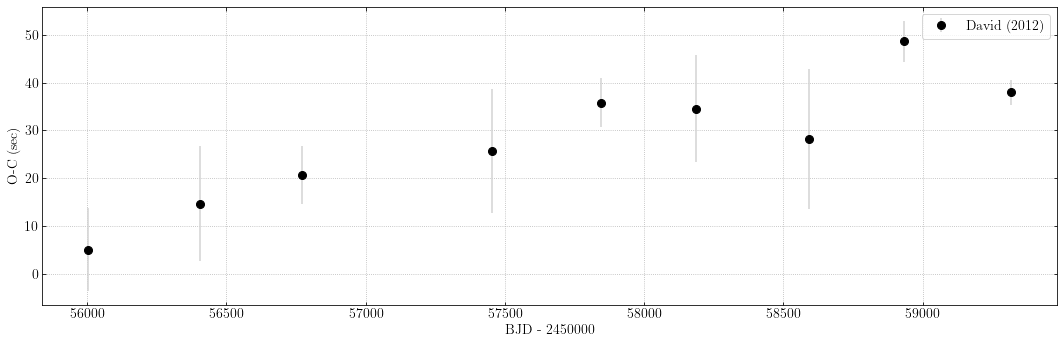

In [128]:
#Plot O-C vs BJD
Input_David_2012  = 'David_2012.out'
Data_David_2012   = np.genfromtxt(Input_David_2012)

N = 2400000
BJD_time_David_2012 = Data_David_2012[:,0] - N
Cycle_David_2012 = Data_David_2012[:,1]
T_O_linear_David_2012 = Data_David_2012[:,2]
T_C_linear_David_2012 = Data_David_2012[:,3]
OC_s_David_2012 = Data_David_2012[:,4]
OC_s_err_David_2012 = Data_David_2012[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_David_2012)
x2 = max(BJD_time_David_2012)
plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'David (2012)')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0], 56, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 56, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-50, 56, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 56, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 56, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 56, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 56, '2020')



#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_David_2012_rev1.jpg", dpi=1000)
plt.show()

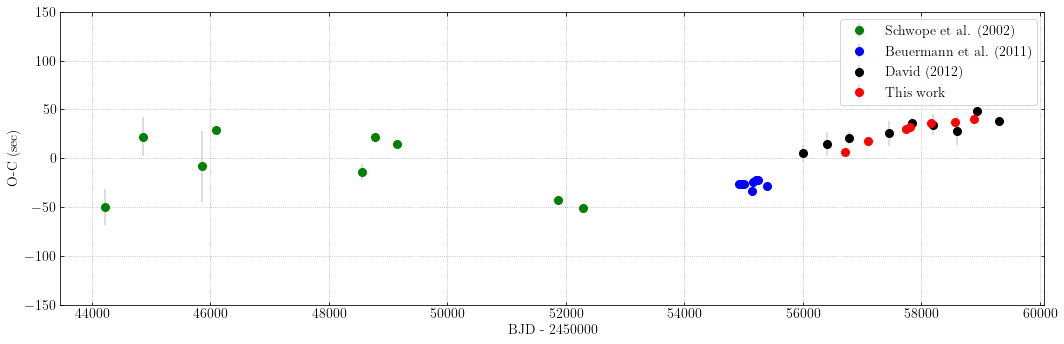

In [129]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

x1 = x1_mean - 2450000 + 2400000
x2 = x2_mean - 2450000 + 2400000
x3 = x3_mean - 2450000 + 2400000
x4 = x4_mean - 2450000 + 2400000
x5 = x5_mean - 2450000 + 2400000
x6 = x6_mean - 2450000 + 2400000
x7 = x7_mean - 2450000 + 2400000
x8 = x8_mean - 2450000 + 2400000
x9 = x9_mean - 2450000 + 2400000

x10 = x10_mean - 2450000 + 2400000
x11 = x11_mean - 2450000 + 2400000
x12 = x12_mean - 2450000 + 2400000
x13 = x13_mean - 2450000 + 2400000
x14 = x14_mean - 2450000 + 2400000
x15 = x15_mean - 2450000 + 2400000
x16 = x16_mean - 2450000 + 2400000
x17 = x17_mean - 2450000 + 2400000
x18 = x18_mean - 2450000 + 2400000

#print(x1)


plt.errorbar(x1_mean, y1_mean, yerr = dy1, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_mean, y2_mean, yerr = dy2, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_mean, y3_mean, yerr = dy3, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_mean, y4_mean, yerr = dy4, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_mean, y5_mean, yerr = dy5, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_mean, y6_mean, yerr = dy6, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_mean, y7_mean, yerr = dy7, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_mean, y8_mean, yerr = dy8, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_mean, y9_mean, yerr = dy9, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_mean, y10_mean, yerr = dy10, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_mean, y11_mean, yerr = dy11, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_mean, y12_mean, yerr = dy12, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_mean, y13_mean, yerr = dy13, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_mean, y14_mean, yerr = dy14, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_mean, y15_mean, yerr = dy15, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_mean, y16_mean, yerr = dy16, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_mean, y17_mean, yerr = dy17, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_mean, y18_mean, yerr = dy18, fmt='o', markersize=8, color='blue',ecolor='lightgray')

plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'David (2012)')

plt.errorbar(x19_mean, y19_mean, yerr = dy19, fmt='o', markersize=8, color='red',ecolor='lightgray', label = 'This work')
plt.errorbar(x20_mean, y20_mean, yerr = dy20, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x21_mean, y21_mean, yerr = dy21, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x22_mean, y22_mean, yerr = dy22, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x23_mean, y23_mean, yerr = dy23, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x24_mean, y24_mean, yerr = dy24, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x25_mean, y25_mean, yerr = dy25, fmt='o', markersize=8, color='red',ecolor='lightgray')

#Schwope_2002
#plt.text(x1, 155, '1979')
#plt.text(x2, 155, '1981')
#plt.text(x3-150, 155, '1984')
#plt.text(x4+150, 155, '1985')
#plt.text(x5-250, 155, '1991')
#plt.text(x6+70, 155, '1992')
#plt.text(x7+200, 155, '1993')
#plt.text(x8-100, 155, '2000')
#plt.text(x9, 155, '2002')

#plt.text(x10-200, 155, '2009')
#plt.text(x16+50, 155, '2010')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 155, '2020')





#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.savefig("Weighted_mean_calculation_rev1.jpg", dpi=1000)
plt.show()

In [130]:
np.savetxt('2022_Feb_week4_Mean_calculation_OC_01.txt', np.c_[x1_mean, y1_mean, dy1], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_02.txt', np.c_[x2_mean, y2_mean, dy2], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_03.txt', np.c_[x3_mean, y3_mean, dy3], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_04.txt', np.c_[x4_mean, y4_mean, dy4], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_05.txt', np.c_[x5_mean, y5_mean, dy5], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_06.txt', np.c_[x6_mean, y6_mean, dy6], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_07.txt', np.c_[x7_mean, y7_mean, dy7], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_08.txt', np.c_[x8_mean, y8_mean, dy8], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_09.txt', np.c_[x9_mean, y9_mean, dy9], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_10.txt', np.c_[x10_mean, y10_mean, dy10], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_11.txt', np.c_[x11_mean, y11_mean, dy11], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_12.txt', np.c_[x12_mean, y12_mean, dy12], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_13.txt', np.c_[x13_mean, y13_mean, dy13], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_14.txt', np.c_[x14_mean, y14_mean, dy14], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_15.txt', np.c_[x15_mean, y15_mean, dy15], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_16.txt', np.c_[x16_mean, y16_mean, dy16], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_17.txt', np.c_[x17_mean, y17_mean, dy17], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_18.txt', np.c_[x18_mean, y18_mean, dy18], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_19.txt', np.c_[x19_mean, y19_mean, dy19], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_20.txt', np.c_[x20_mean, y20_mean, dy20], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_21.txt', np.c_[x21_mean, y21_mean, dy21], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_22.txt', np.c_[x22_mean, y22_mean, dy22], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_23.txt', np.c_[x23_mean, y23_mean, dy23], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_24.txt', np.c_[x24_mean, y24_mean, dy24], fmt="%.5f")
np.savetxt('2022_Feb_week4_Mean_calculation_OC_25.txt', np.c_[x25_mean, y25_mean, dy25], fmt="%.5f")